In [1]:
import numpy as np
import pandas as pd
import keras 
from keras import models
from keras import layers

Using TensorFlow backend.


In [0]:
from keras.datasets import boston_housing

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
pd.DataFrame(train_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
5,0.28392,0.0,7.38,0.0,0.4930,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
6,9.18702,0.0,18.10,0.0,0.7000,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60
7,4.09740,0.0,19.58,0.0,0.8710,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42
8,2.15505,0.0,19.58,0.0,0.8710,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65
9,1.62864,0.0,21.89,0.0,0.6240,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41


In [7]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std

In [0]:
test_data -= mean
test_data /= std

In [9]:
train_data.shape[1]

13

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = "relu", input_shape = (train_data.shape[1], )))
  model.add(layers.Dense(64, activation = "relu"))
  model.add(layers.Dense(1))
  model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return model

In [0]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [0]:
np.concatenate( [train_data[:0 * num_val_samples], train_data[(0 + 1) * num_val_samples:] ], axis=0)

array([[-3.43452240e-01, -4.83615471e-01, -7.20935262e-01, ...,
        -4.89607866e-01,  3.31155526e-01, -1.41753234e+00],
       [-3.54267805e-01, -4.83615471e-01, -1.77047370e-01, ...,
        -3.45777812e-02,  4.40949066e-01, -1.49289088e-03],
       [-3.91977095e-01, -4.83615471e-01, -6.16567586e-01, ...,
        -2.62092823e-01,  3.25836072e-01, -1.09043551e+00],
       ...,
       [-4.02029872e-01,  9.90796508e-01, -7.41514804e-01, ...,
        -7.17122908e-01,  7.94389419e-02, -6.77769041e-01],
       [-1.72920175e-01, -4.83615471e-01,  1.24588095e+00, ...,
        -1.71818909e+00, -9.87643619e-01,  4.20834664e-01],
       [-4.04226140e-01,  2.04394792e+00, -1.20161456e+00, ...,
        -1.30866202e+00,  2.33171175e-01, -1.15392266e+00]])

In [0]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1)
  val_mse, val_mae = model.evaluate(val_data, val_targets)
  all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
303/303 [==============================] - 1s 3ms/step - loss: 202.8881 - mean_absolute_error: 10.7900
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 30.4470 - mean_absolute_error: 3.8483
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 21.4310 - mean_absolute_error: 3.1844
Epoch 4/100
303/303 [==============================] - 0s 1ms/step - loss: 18.3017 - mean_absolute_error: 2.9013
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 16.6693 - mean_absolute_error: 2.6684
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 15.5298 - mean_absolute_error: 2.5727
Epoch 7/100
303/303 [==============================] - 0s 954us/step - loss: 14.2335 - mean_absolute_error: 2.5355
Epoch 8/100
303/303 [==============================] - 0s 947us/step - loss: 13.8642 - mean_absolute_error: 2.4215
Epoch 9/100
303/303 [==============================] - 0s 943us/step -

In [0]:
all_scores

[2.067520614897851, 2.3101874412876544, 2.788971006280125, 2.397548013394422]

In [0]:
np.mean(all_scores)

2.3910567689650133

In [0]:
num_epochs = 100
all_mae_histories = []

In [26]:

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data, val_targets), epochs = num_epochs, batch_size = 1)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 1s 3ms/step - loss: 202.3415 - mean_absolute_error: 10.7713 - val_loss: 35.6956 - val_mean_absolute_error: 4.0291
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 30.2519 - mean_absolute_error: 3.8354 - val_loss: 20.9133 - val_mean_absolute_error: 3.1134
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 21.3284 - mean_absolute_error: 3.1770 - val_loss: 20.0590 - val_mean_absolute_error: 2.9642
Epoch 4/100
303/303 [==============================] - 0s 1ms/step - loss: 18.2665 - mean_absolute_error: 2.8979 - val_loss: 18.1198 - val_mean_absolute_error: 2.7566
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 16.6277 - mean_absolute_error: 2.6652 - val_loss: 14.5292 - val_mean_absolute_error: 2.6186
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 15.4951 - mean_absolut

In [31]:
all_mae_histories.shape

AttributeError: ignored

In [32]:
np.array(all_mae_histories).shape

(4, 100)

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

In [53]:
smooth_mae_history

[2.8402253873277417,
 2.8129164835013962,
 2.7956331970195953,
 2.7667063829261473,
 2.75034951365773,
 2.7277977894032825,
 2.713591990959616,
 2.6985666060266738,
 2.6740325686532693,
 2.656551623566058,
 2.6339833880993435,
 2.6037991711693267,
 2.5842335620631,
 2.573617475023982,
 2.567851847373933,
 2.546238771839123,
 2.539692179236801,
 2.5442035353709547,
 2.540708661028765,
 2.520794660102476,
 2.507194643463529,
 2.4967837459660065,
 2.487391430324079,
 2.4712097465705334,
 2.4569675823758654,
 2.451903207914462,
 2.4560277172137552,
 2.4408477483372297,
 2.436471553624462,
 2.4470887637084653,
 2.447674540526683,
 2.4338305747085442,
 2.4231443214353976,
 2.424014956232619,
 2.425420539433542,
 2.413912165598702,
 2.4082792624869542,
 2.4176685020435844,
 2.4138460816569927,
 2.40749709407682,
 2.409304815762675,
 2.3949981854243183,
 2.417321496771875,
 2.413889075832887,
 2.4075214446527795,
 2.4012840766203696,
 2.3939448823088365,
 2.394287987497434,
 2.395155521772688,

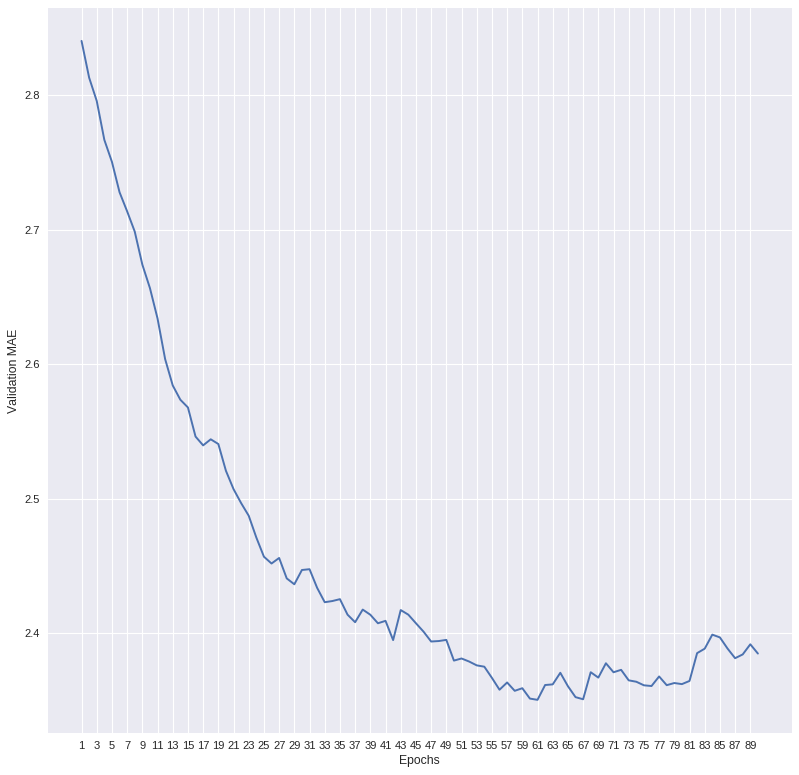

In [64]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xticks(np.arange(min(range(1, len(smooth_mae_history) + 1)), max(range(1, len(smooth_mae_history) + 1))+1, 2.0))
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [11]:
model = build_model()
model.fit(train_data, train_targets, epochs=61, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 268us/step


In [12]:
test_mae_score

940.4086578967524